<a href="https://colab.research.google.com/github/devdandekar24/Machine-Learning/blob/main/MNIST_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data = 10,000 images
Grayscale Images
Image Dimension 28 X 28

In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

#Converting the numpy array to image

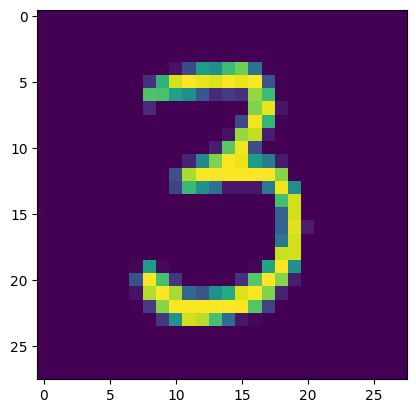

3


In [ ]:
plt.imshow(X_train[50])
plt.show()
#printing the corresponding label
print(Y_train[50])

#Image Labels

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
#to get unique values in y_train
print(np.unique(Y_train))

#to get unique values in y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can use one hot encodeing

In [ ]:
# all the images have the same dimensions in the dataset, if not we have to resize all the images to common dimensions
#scaling the values between 0 to 1 [Normalization]

X_train=X_train/255
X_test=X_test/255


In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#Building the neural network

In [ ]:
#setting up layers of the neural network

model=keras.Sequential([
    #flatten inputs data in 1Dimension
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   #here 10 means number of classes in the layer ( output layer )
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   #for one hot encoding
              metrics=['accuracy'])

In [ ]:
#training the neural network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8581 - loss: 0.4986
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9572 - loss: 0.1430
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9684 - loss: 0.1049
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9751 - loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9823 - loss: 0.0569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9853 - loss: 0.0485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9871 - loss: 0.0421
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0372
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0311


The training data accuracy is 98.9 percent

#Accuracy on test data

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1272
0.9725000262260437


the test data accuracy is 97.02 percent

In [ ]:
  print(X_test.shape)

(10000, 28, 28)


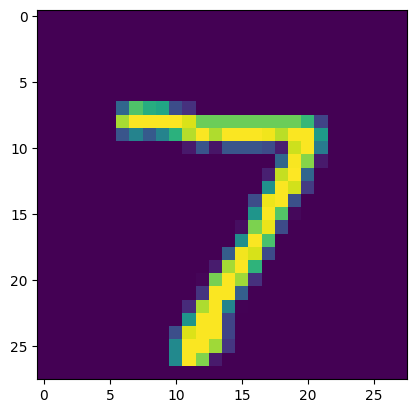

In [ ]:
#first datapoint in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])        #gives the probability of getting several values

[2.6083810e-02 1.3519157e-04 1.7383944e-03 9.5771104e-01 4.3369536e-08
 7.6871164e-02 8.1021243e-09 9.9999744e-01 6.7301607e-01 5.1618135e-01]


# model.predict gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probabilities to class label

label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)                #the output is index and not answer itself

7


In [ ]:
#converting the predition probabilities to class label for all the test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 6, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 9, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test are true labels and Y_preds are predicted labels

#confusion matrix

In [ ]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 954    0    4    3    4    3    4    1    1    6]
 [   0 1116    6    2    0    0    1    4    5    1]
 [   2    0 1008    3    2    0    2    6    7    2]
 [   0    0    5  973    0   13    0    8    5    6]
 [   1    0    3    0  954    0    9    2    1   12]
 [   2    0    0    8    0  866    9    1    5    1]
 [   4    3    0    1    5    3  938    0    4    0]
 [   1    1   12    1    1    0    0 1000    5    7]
 [   4    0    4    6    4    6    3    5  939    3]
 [   2    2    1    2   13    5    0    2    6  976]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

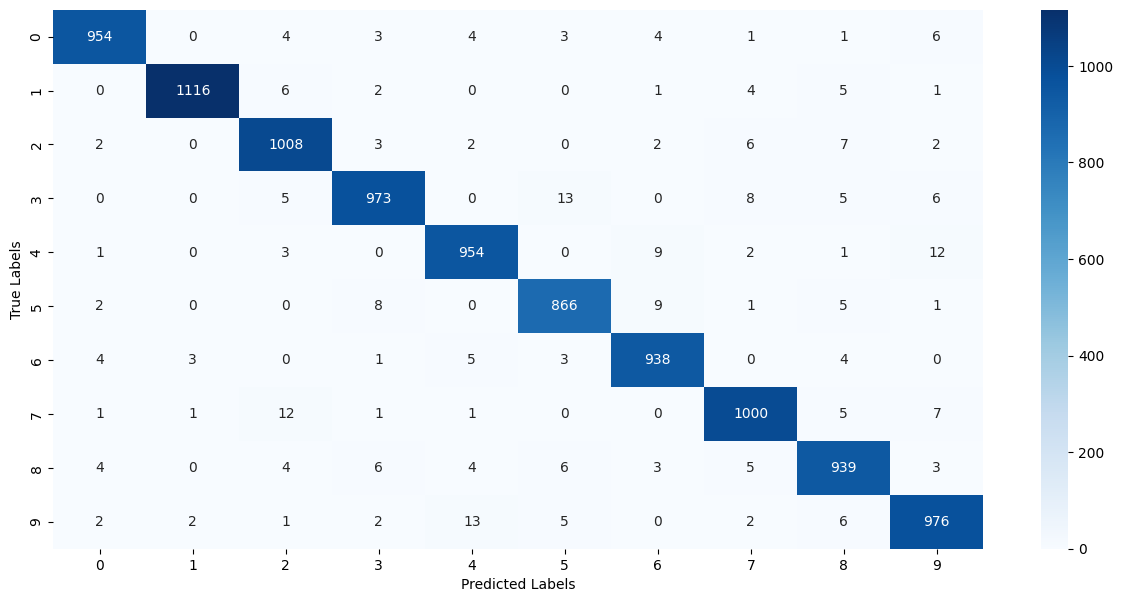

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [ ]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

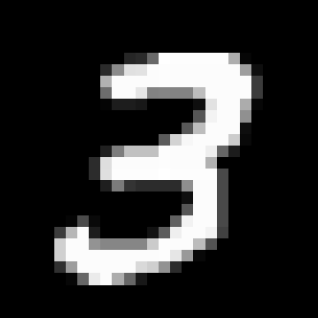

(318, 318, 3)

In [ ]:
cv2_imshow(input_image)
input_image.shape     #the image is of different size and rgb insted of grayscale

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
#resizing the image
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])     #telling the neural network that only one image is taken as input not many with size 28,28

In [ ]:
input_prediction=model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
print(np.argmax(input_prediction))

5


#Predictive System

Enter the path of image to be predicted : /content/MNIST_digit.png


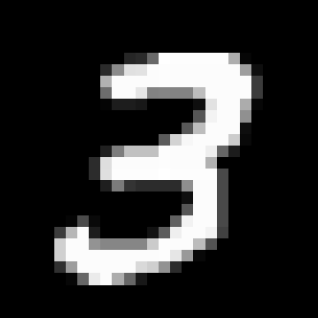

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The Handwritten digit is recognized as 3


In [ ]:
input_image_path=input("Enter the path of image to be predicted : ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

print("The Handwritten digit is recognized as" ,np.argmax(input_prediction))